# 1. Загрузка данных

In [164]:
import pandas as pd

In [165]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# 2. Первичный анализ данных

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [167]:
# проверка, что минимальный возраст и уровень образования не равны 0 (может означать пропуск)

df['age'].min(), df['educational-num'].min()

(17, 1)

In [168]:
# в колонках с данными типа int64 пропусков нет

In [169]:
# а вот атрибуты object стоит проверить, т.к. вместо пустых начений могу быть указаны -/? и т.д.

for col in df.select_dtypes(include=[object]).columns:
  print(col, '\n', df[col].unique(), '\n')

workclass 
 ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education 
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool'] 

marital-status 
 ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation 
 ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces'] 

relationship 
 ['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative'] 

race 
 ['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

gender 
 ['Male' 'Female'] 

native-country 
 ['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ire

In [170]:
# workclass, occupation и native-country содержат пропуски (значения '?')

# 3. Анализ пропусков
Поиск, удаление и альтернативные способы работы с ними.



In [171]:
# workclass

df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [172]:
# occupation

df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [173]:
# 2799 записей содержат пустые значения одновременно в двух столбцах "класс работы" и "род деятельности"
# в качестве значения для заполнения пропусков в workclass можно использовать "Private" (это значение указано примерно для 70% записей датасета)

df[(df['occupation'] == '?') & (df['workclass'] == '?')].shape

(2799, 15)

In [174]:
# для остальных записей с пустым значением occupation в workclass указано "Never-worked", т.е. они никогда не работали.
# вполне логично в occupation для них указать новый признак по аналогии с "Never-worked".

df[(df['occupation'] == '?') & (df['workclass'] != '?')].head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
8785,17,Never-worked,131593,11th,7,Never-married,?,Own-child,Black,Female,0,0,20,United-States,<=50K
11607,20,Never-worked,273905,HS-grad,9,Married-spouse-absent,?,Other-relative,White,Male,0,0,35,United-States,<=50K
13898,18,Never-worked,162908,11th,7,Never-married,?,Own-child,White,Male,0,0,35,United-States,<=50K
21642,18,Never-worked,206359,10th,6,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
27126,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,White,Male,0,0,35,United-States,<=50K
31053,17,Never-worked,237272,10th,6,Never-married,?,Own-child,White,Male,0,0,30,United-States,<=50K
36618,18,Never-worked,157131,11th,7,Never-married,?,Own-child,White,Female,0,0,10,United-States,<=50K
39513,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Black,Male,0,0,40,United-States,<=50K
48585,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
48595,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


In [175]:
# native-country

df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [176]:
# вычислить страну происхождения для 857 записей невозможно
# в качестве значения для заполнения пропусков можно использовать "United-States" (это значение указано примерно для 90% записей датасета),

## 3.1. Удаление пропусков

In [177]:
df = df[~(df['occupation'] == '?')] # workclass и occupation
df = df[~(df['native-country'] == '?')] # native-country
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   education        45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   marital-status   45222 non-null  object
 6   occupation       45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  object
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  native-country   45222 non-null  object
 14  income           45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


# 4. Визуализация

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

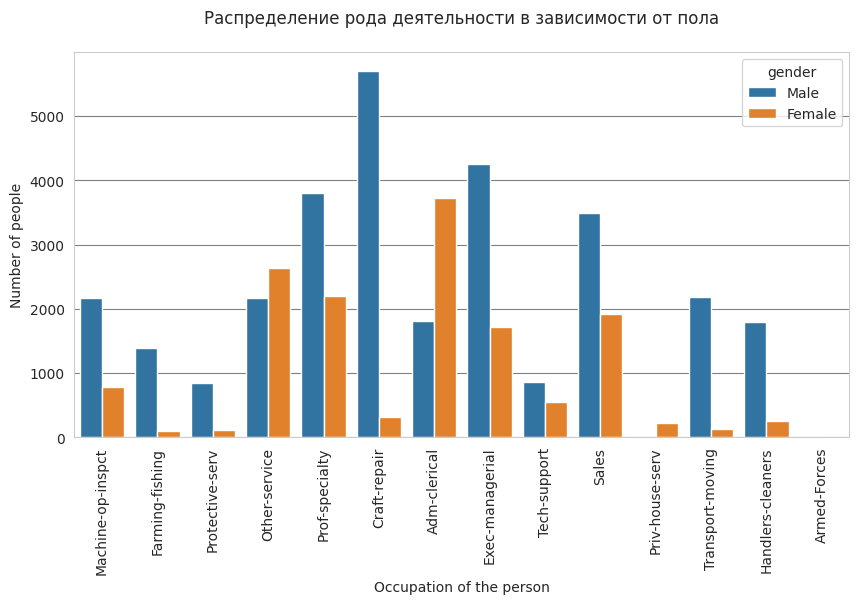

In [179]:
# визуально сразу видно:
# - "Craft-repair" - "мужской" вид деятельности и им занимается достаточно большое количество людей
# - "Priv-house-serv" и "Adm-clerical" - "женский" вид деятельности
# - "Armed-Forces" - самый непопулярный вид деятельности

plt.figure(figsize=(10,5))

chart = sns.countplot(df,
                      x="occupation",
                      hue="gender"
).set(xlabel='Occupation of the person',
      ylabel='Number of people',
      title='Распределение рода деятельности в зависимости от пола\n')

plt.xticks(rotation = 90)
plt.show()

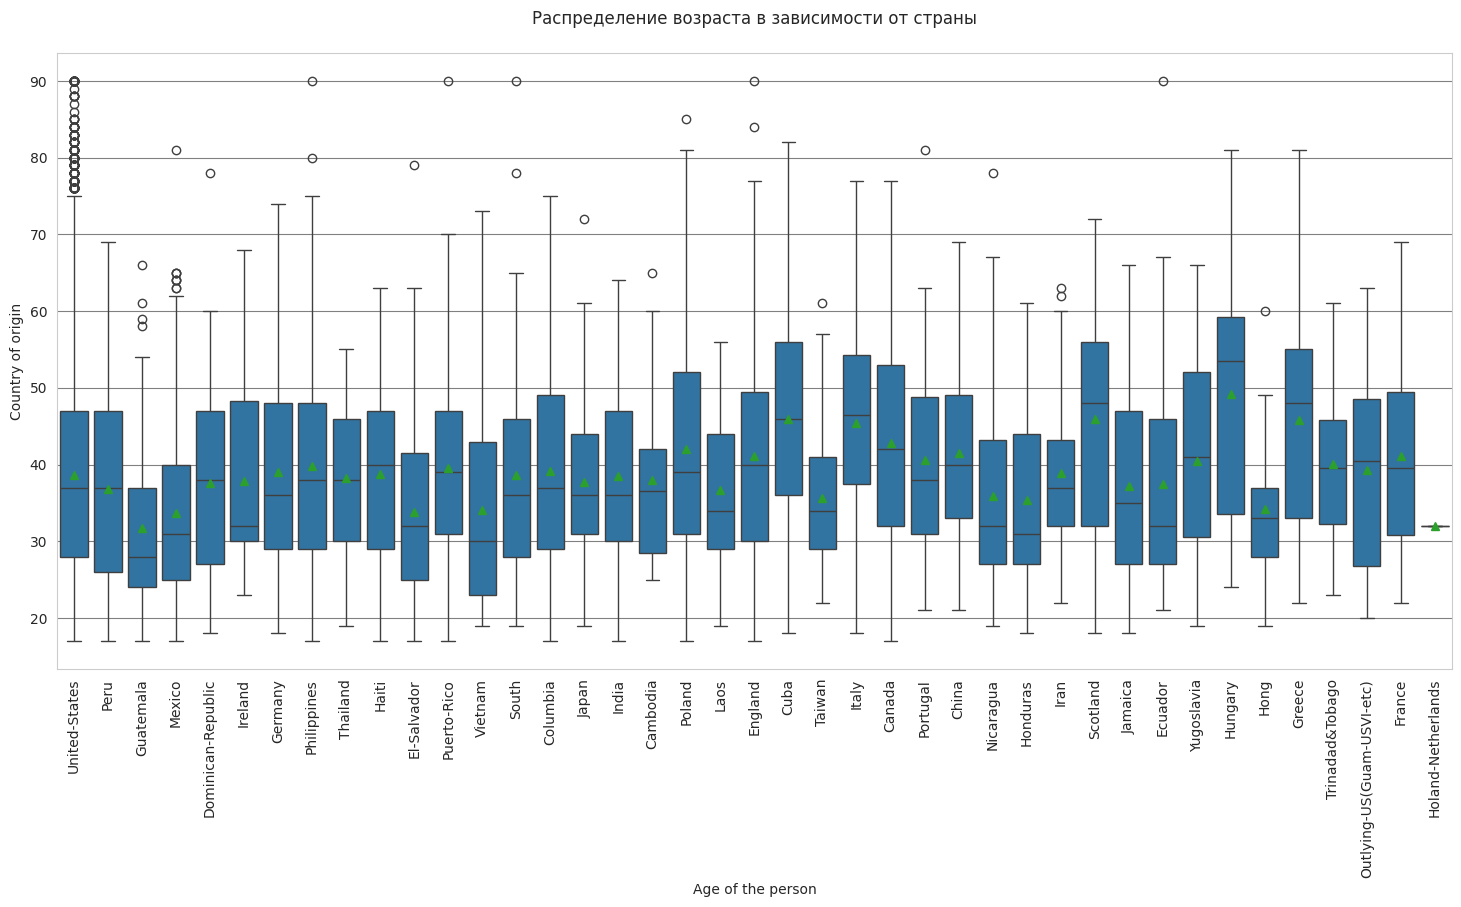

In [180]:
# для данного датасета визуально можно заметить, что:
# - в некоторых странах минимальный возраст > 20 (Ирландия, Камбоджа, Венгрия и т.д.)
# - данных по Нидерландам почти нет (возможно, именно эта страна должна была быть указана вместо пропусков, которые удалили выше)

plt.figure(figsize=(18,8))

chart = sns.boxplot(df,
            x="native-country",
            y="age",
            showmeans=True
).set(xlabel='Age of the person',
      ylabel='Country of origin',
      title='Распределение возраста в зависимости от страны\n')

sns.set_style("whitegrid", {'grid.color': 'grey', 'grid.linestyle': '-'})
plt.xticks(rotation = 90)
plt.show()

# 5. Работа с категориальными признаками

In [181]:
X = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status',
                                     'occupation', 'relationship', 'race',
                                     'gender', 'native-country'])

X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,0,0,50,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,0,0,40,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,7688,0,40,>50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,34,198693,6,0,0,30,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [182]:
# вместо 15 столбцов стало 104 (без учета целевой переменной)

del X['income']

df.shape, X.shape

((45222, 15), (45222, 104))

# 6. Разделение данных на train и test

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [184]:
le = LabelEncoder()
le.fit(df['income'])

y = pd.Series(le.transform(df['income']))

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Обучение моделей

## 7.1. Логистическая регрессия

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [188]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [189]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [190]:
# кроме того, можно сравнить точность для признаков после масштабирования

model_standard = make_pipeline(
    StandardScaler(),
    LogisticRegression())

model_standard.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

## 7.2. Метод опорных векторов

In [35]:
from sklearn.svm import SVC

In [36]:
model_clf = SVC()

model_clf.fit(X_train, y_train)

SVC()

In [37]:
model_clf_standard = make_pipeline(
    StandardScaler(),
    SVC())

model_clf_standard.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

# 8. Оценка точности предсказания моделей

## 8.1. Логистическая регрессия

In [191]:
model.score(X_train, y_train)

0.7904469690687453

In [192]:
model.score(X_test, y_test)

0.7954671088999448

In [193]:
model_standard.score(X_train, y_train)

0.8485778256903558

In [194]:
model_standard.score(X_test, y_test)

0.8509673852957435

## 8.2. Метод опорных векторов

In [42]:
model_clf.score(X_train, y_train)

0.7895624291677033

In [43]:
model_clf.score(X_test, y_test)

0.7948037589828635

In [44]:
model_clf_standard.score(X_train, y_train)

0.8586118251928021

In [45]:
model_clf_standard.score(X_test, y_test)

0.8512990602542841

# 9. Выводы

**Логистическая регрессия** показывает хороший результат (0.79).

При этом, после стандартизации результат становится лучше (0.85).



**Метод опорных векторов** показывает примерно аналогичные результаты.

Если построить матрицу корреляции между всеми признаками, то видно,
 что у **income** (в таблице income_le) достаточно слабая зависимость от остальных параметров.

 При этом, использование всех признаков для построения моделей дает хороший результат.

In [104]:
le_ = LabelEncoder()

for col in df.select_dtypes(include=[object]).columns:
  le_.fit(df[col])
  df[col+'_le'] = le_.transform(df[col])

df.corr()

<ipython-input-104-a021c918631e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_le,education_le,marital-status_le,occupation_le,relationship_le,race_le,gender_le,native-country_le,income_le
age,1.000000,-0.075792,0.037623,0.079683,0.059351,0.101992,0.085892,-0.003511,-0.271623,-0.004474,-0.247564,0.023776,0.082053,-0.003180,0.237040
fnlwgt,-0.075792,1.000000,-0.041993,-0.004110,-0.004349,-0.018679,-0.034970,-0.025318,0.033096,-0.002036,0.009909,-0.029188,0.027240,-0.061098,-0.007264
educational-num,0.037623,-0.041993,1.000000,0.126907,0.081711,0.146206,0.040779,0.347444,-0.064986,0.089686,-0.088431,0.031655,0.003417,0.092994,0.332800
capital-gain,0.079683,-0.004110,0.126907,1.000000,-0.032102,0.083880,0.034543,0.029889,-0.042399,0.019435,-0.056818,0.014078,0.047444,0.007643,0.221034
capital-loss,0.059351,-0.004349,0.081711,-0.032102,1.000000,0.054195,0.008233,0.016877,-0.034820,0.015267,-0.058425,0.020955,0.046457,0.005955,0.148687
hours-per-week,0.101992,-0.018679,0.146206,0.083880,0.054195,1.000000,0.051366,0.060887,-0.183178,0.016160,-0.259194,0.044738,0.231425,0.007554,0.227199
workclass_le,0.085892,-0.034970,0.040779,0.034543,0.008233,0.051366,1.000000,0.017846,-0.033221,0.017508,-0.065049,0.049765,0.069638,0.003889,0.015659
education_le,-0.003511,-0.025318,0.347444,0.029889,0.016877,0.060887,0.017846,1.000000,-0.041520,-0.033499,-0.013179,0.011457,-0.027569,0.077893,0.081196
marital-status_le,-0.271623,0.033096,-0.064986,-0.042399,-0.034820,-0.183178,-0.033221,-0.041520,1.000000,0.016399,0.180436,-0.070302,-0.120008,-0.022721,-0.192711
occupation_le,-0.004474,-0.002036,0.089686,0.019435,0.015267,0.016160,0.017508,-0.033499,0.016399,1.000000,-0.051644,-0.000026,0.056625,-0.002848,0.049787
